In [ ]:
# Calling all the dependencies for this project
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.drop(['CustomerId','RowNumber','Surname'], axis = 'columns', inplace =True)

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
 df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
 df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
 df['Gender'].replace(['Male', 'Female'],[1, 0], inplace= True)

In [ ]:
#one hot encoding
df = pd.get_dummies(data = df, columns=['Geography'])
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [ ]:
#get in to temp fframe
df_exited = df[df['Exited']==1]['Tenure']
df_not_exited = df[df['Exited']==0]['Tenure']

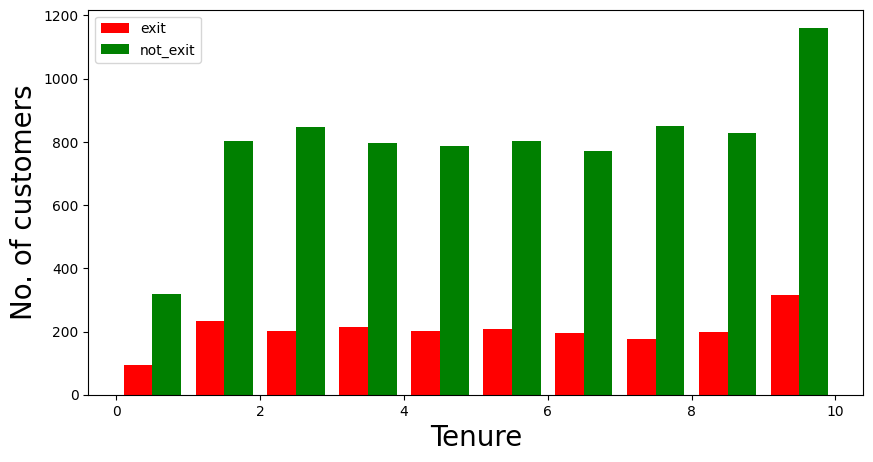

In [ ]:
visualization(df_exited, df_not_exited, "Tenure")

In [ ]:
df_exited1 = df[df['Exited']==1]['Age']
df_not_exited1= df[df['Exited']==0]['Age']

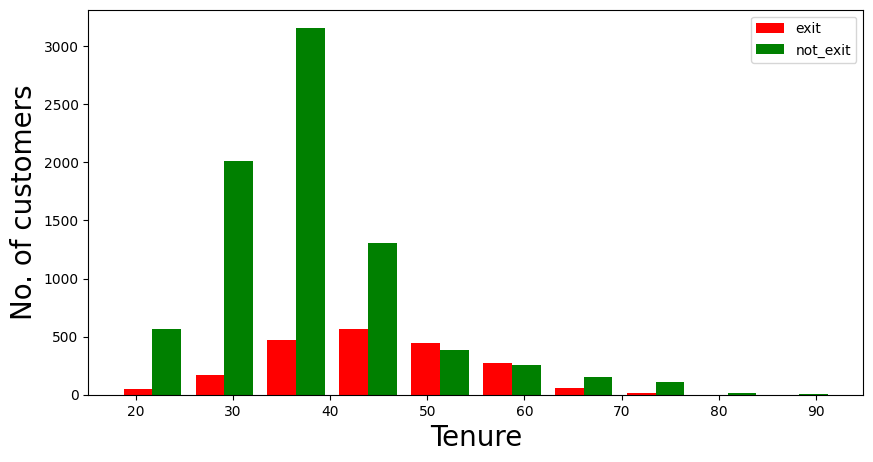

In [ ]:
visualization(df_exited1, df_not_exited1, "Tenure")

In [ ]:
# normalization
cols_to_scale = ['CustomerId','CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Select only the numerical features for scaling
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Fit the scaler on the numerical features and transform them
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
#separate outcome or target col
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5426 - loss: 0.7047
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8054 - loss: 0.4509
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8102 - loss: 0.4355
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8167 - loss: 0.4264
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8391 - loss: 0.3954
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8488 - loss: 0.3721
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8571 - loss: 0.3595
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8476 - loss: 0.3592
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.3527
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.3377
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.3357
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.3319


[0.33903807401657104, 0.8544999957084656]

In [ ]:
yp=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

# Convert predicted probabilities to class labels using a threshold (e.g., 0.5)
y_pred = np.where(yp > 0.5, 1, 0)  # Assuming binary classification

# Now use yp_classes in the classification_report function
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.68      0.54      0.60       405

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1490,  105],
       [ 186,  219]], dtype=int32)>